## DATA TRAINING

In [1]:
import numpy as np
import pandas as pd
import math
import joblib

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("augmented_only.csv")
seed = 33
df

,time_Seconds,round_trip,stop,time,elapsed,lat,lon,next_stop
0,29705.0,NaN,6.0,8:15:05,NaN,18.403879,-66.048199,13.0
1,29742.0,NaN,13.0,8:15:42,37.0,18.403955,-66.049898,24.0
2,29837.0,NaN,23.0,8:17:17,95.0,18.406440,-66.050140,20.0
3,29898.0,NaN,20.0,8:18:18,61.0,18.407062,-66.049323,19.0
4,29932.0,NaN,19.0,8:18:52,34.0,18.406503,-66.048520,9.0
...,...,...,...,...,...,...,...,...
2051,55159.0,1142.0,1.0,15:19:19,233.0,18.407170,-66.041989,2.2
2052,55308.0,1121.0,3.0,15:21:48,149.0,18.404856,-66.044836,4.0
2053,55359.0,1140.0,4.0,15:22:39,51.0,18.403636,-66.045492,5.0
2054,55404.0,1160.0,5.0,15:23:24,45.0,18.403751,-66.046593,6.0


### Predicting time until next stop

In [9]:
#modify if necessary
sub = df[['stop','time_Seconds','elapsed']]
sub = df.dropna()



####
### Testing and training with dif files
####

training = pd.read_csv("augmented_only.csv")
testing = pd.read_csv("cleaned.csv")
sub_testing = testing[['stop','time_Seconds','elapsed']]
sub_testing = sub_testing.dropna()

sub_training = training[['stop','time_Seconds','elapsed']]
sub_training = sub_training.dropna()

X_train = sub_training[['stop','time_Seconds']]
y_train= sub_training['elapsed']

X_test = sub_testing[['stop','time_Seconds']]
y_test = sub_testing['elapsed']



Sample times


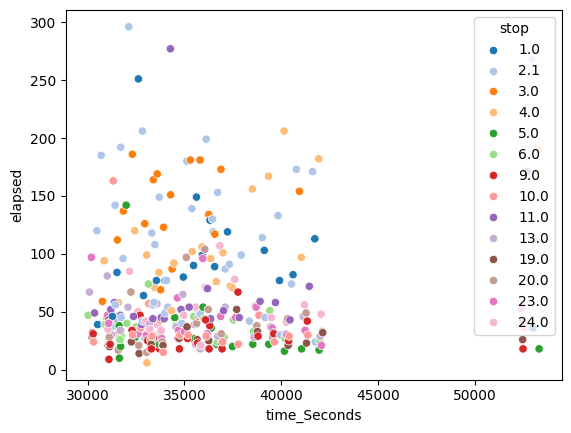

Augmented_only times


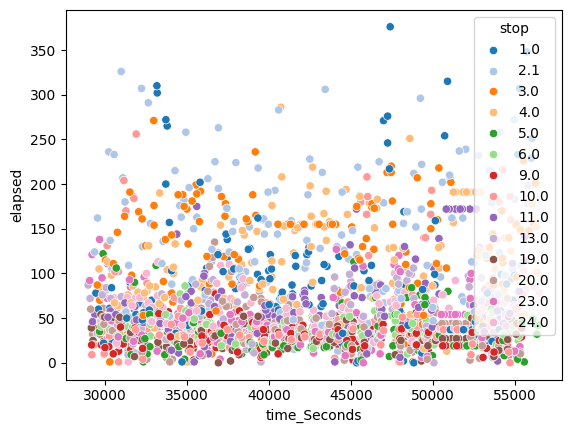

Predicted times


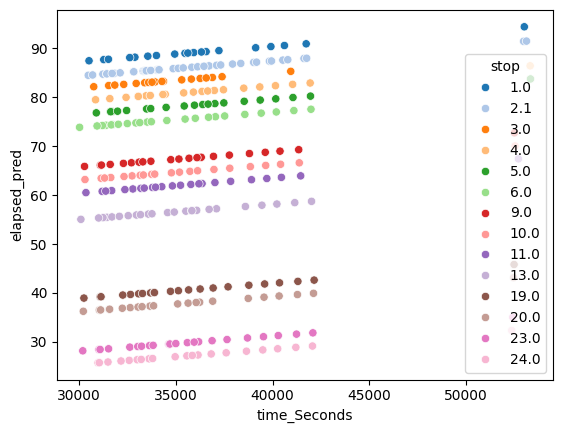

Differences between real and predicted times


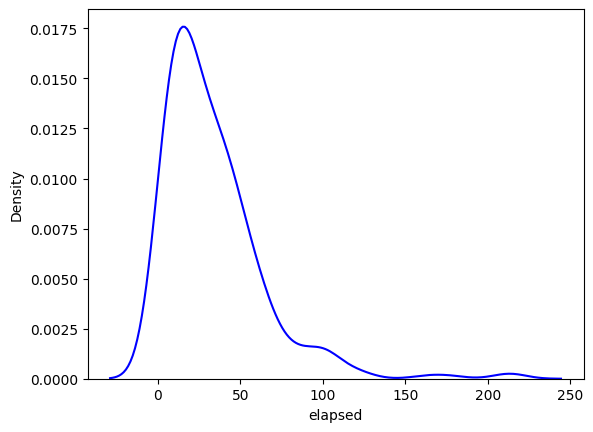

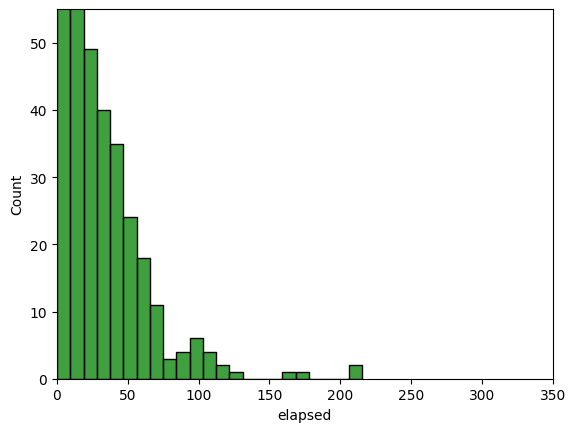

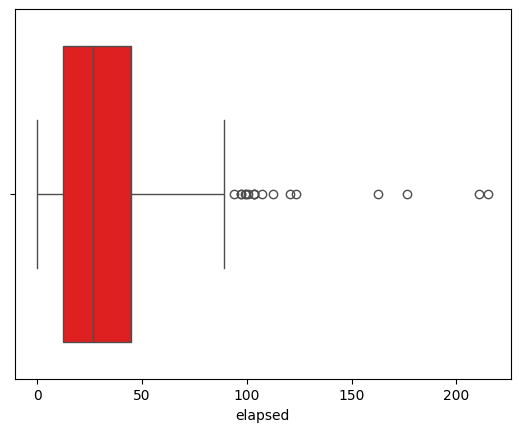

Statistical data
count    323.000000
mean      33.531454
std       30.667813
min        0.107222
25%       12.443529
50%       26.852106
75%       44.944629
max      215.280565
Name: elapsed, dtype: float64


In [10]:

reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)
X_train['elapsed']=y_train
#Graph results
pred = X_test
dat = X_test
pred['elapsed_pred']=y_pred
dat['elapsed']=y_test

print("Sample times")
sns.scatterplot(data=dat,x='time_Seconds',y='elapsed',hue='stop',palette="tab20")
plt.show()

print('Augmented_only times')
sns.scatterplot(data=X_train,x='time_Seconds',y='elapsed',hue='stop',palette="tab20")
plt.show()

print("Predicted times")
sns.scatterplot(data=pred,x='time_Seconds',y='elapsed_pred',hue='stop',palette="tab20")
plt.show()

print("Differences between real and predicted times")

dif = np.abs(y_test - y_pred)
sns.kdeplot(x=dif, color='blue')
plt.show()

sns.histplot(x=dif,color='green')
plt.xlim(0,350)
plt.ylim(0,55)
plt.show()

sns.boxplot(x=dif,color='red')
plt.show()

print("Statistical data")
print(pd.Series(dif).describe())

Sample times


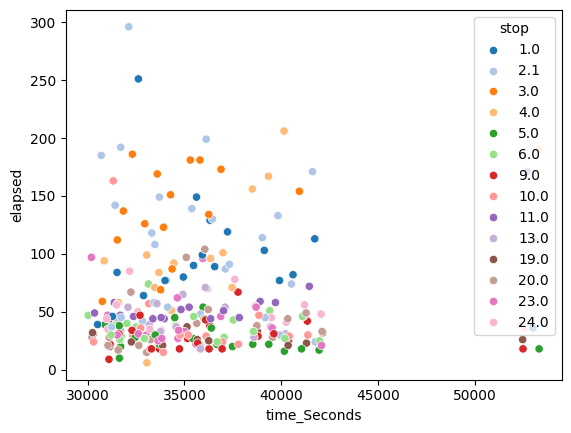

Predicted times


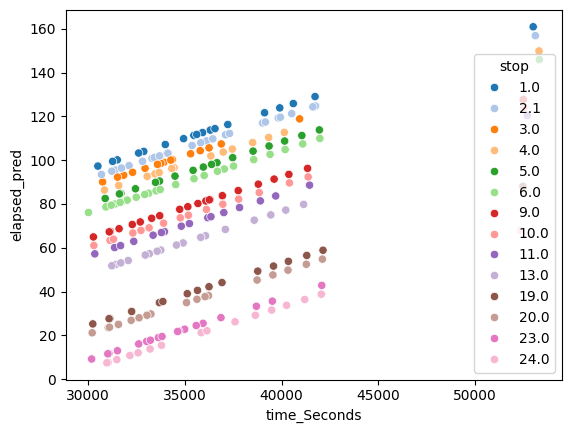

Differences between real and predicted times


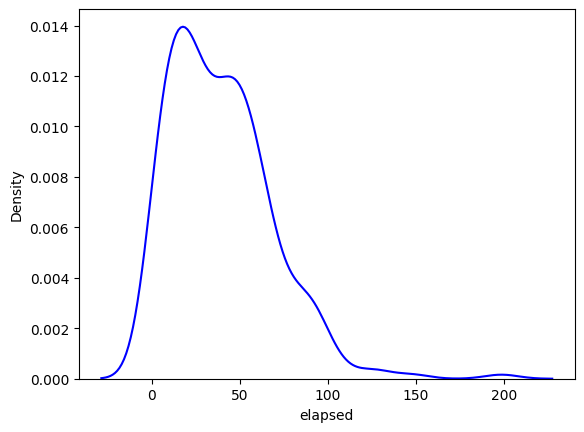

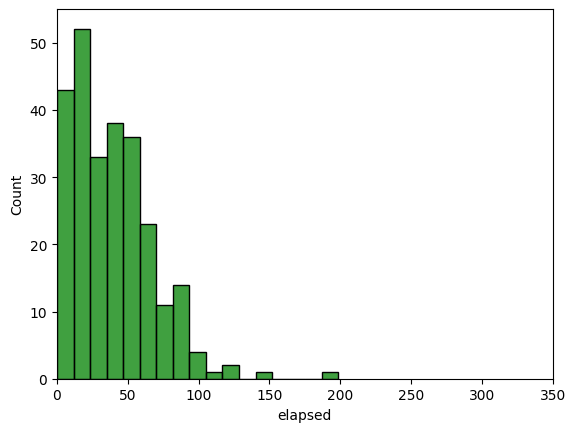

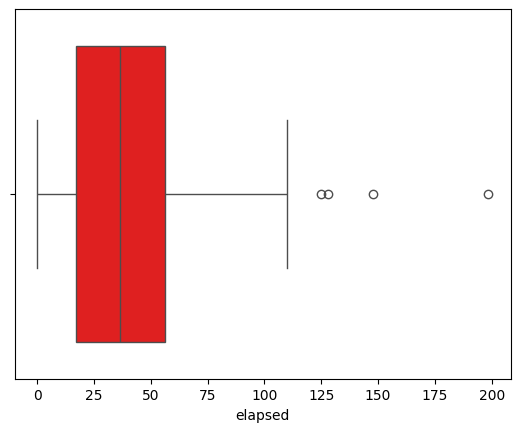

Statistical data
count    259.000000
mean      39.452276
std       29.174702
min        0.173071
25%       16.976260
50%       36.542752
75%       56.429574
max      198.509004
Name: elapsed, dtype: float64


In [11]:

X = sub_testing[['stop','time_Seconds']]
y = sub_testing['elapsed']

#Linear Regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=seed)

reg = LinearRegression().fit(X_train, y_train)

y_pred = reg.predict(X_test)

#Graph results
pred = X_test
dat = X_test
pred['elapsed_pred']=y_pred
dat['elapsed']=y_test

print("Sample times")
sns.scatterplot(data=dat,x='time_Seconds',y='elapsed',hue='stop',palette="tab20")
plt.show()

print("Predicted times")
sns.scatterplot(data=pred,x='time_Seconds',y='elapsed_pred',hue='stop',palette="tab20")
plt.show()

print("Differences between real and predicted times")

dif = np.abs(y_test - y_pred)
sns.kdeplot(x=dif, color='blue')
plt.show()

sns.histplot(x=dif,color='green')
plt.xlim(0,350)
plt.ylim(0,55)
plt.show()

sns.boxplot(x=dif,color='red')
plt.show()

print("Statistical data")
print(pd.Series(dif).describe())

In [5]:
#save model
joblib.dump(reg,"model.pkl")

['model.pkl']

In [6]:
pred

,stop,time_Seconds,elapsed_pred,elapsed
258,24.0,32503.0,-3.670920,28.0
348,24.0,33267.0,-2.606182,29.0
344,4.0,33094.0,104.630973,52.0
315,5.0,31185.0,96.596608,35.0
71,1.0,34459.0,122.655025,59.0
...,...,...,...,...
40,2.1,32376.0,113.840776,22.0
15,5.0,30948.0,96.266316,29.0
102,2.2,31654.0,112.297179,207.0
215,20.0,33814.0,19.651788,16.0


In [7]:
pred['stop'].unique()

array([24. ,  4. ,  5. ,  1. ,  2.1,  2.2, 11. , 10. ,  6. , 23. , 20. ,
        3. , 13. , 19. ,  9. ])

In [8]:
pred[pred['elapsed_pred'] < 0]

,stop,time_Seconds,elapsed_pred,elapsed
258,24.0,32503.0,-3.670920,28.0
348,24.0,33267.0,-2.606182,29.0
363,24.0,34473.0,-0.925456,30.0
19,23.0,31132.0,-0.207683,13.0
243,24.0,31481.0,-5.095216,40.0
198,24.0,32809.0,-3.244467,31.0
94,23.0,30913.0,-0.512889,14.0
318,24.0,31327.0,-5.309836,31.0
123,24.0,33146.0,-2.774812,28.0
333,24.0,32276.0,-3.987276,27.0


In [9]:
pred['time_slot'] = pred['time_Seconds']//3600

In [10]:
pred[pred['stop']==1]

,stop,time_Seconds,elapsed_pred,elapsed,time_slot
71,1.0,34459.0,122.655025,59.0,9.0
26,1.0,31680.0,118.782109,372.0,8.0
131,1.0,33908.0,121.887131,376.0,9.0
281,1.0,33763.0,121.685054,118.0,9.0
326,1.0,31843.0,119.009272,166.0,8.0
341,1.0,32811.0,120.358312,229.0,9.0
221,1.0,34233.0,122.340063,78.0,9.0
146,1.0,34735.0,123.039668,8.0,9.0
101,1.0,31447.0,118.457392,281.0,8.0
251,1.0,32043.0,119.287999,362.0,8.0


In [11]:
pred

,stop,time_Seconds,elapsed_pred,elapsed,time_slot
258,24.0,32503.0,-3.670920,28.0,9.0
348,24.0,33267.0,-2.606182,29.0,9.0
344,4.0,33094.0,104.630973,52.0,9.0
315,5.0,31185.0,96.596608,35.0,8.0
71,1.0,34459.0,122.655025,59.0,9.0
...,...,...,...,...,...
40,2.1,32376.0,113.840776,22.0,8.0
15,5.0,30948.0,96.266316,29.0,8.0
102,2.2,31654.0,112.297179,207.0,8.0
215,20.0,33814.0,19.651788,16.0,9.0


In [14]:
new_df = pred.groupby(['stop', 'time_slot']).mean().reset_index()

In [27]:
df_database = new_df.drop(['time_Seconds','elapsed'], axis=1)

In [28]:
df_database

,stop,time_slot,elapsed_pred
0,1.0,8.0,118.884193
1,1.0,9.0,121.849085
2,2.1,8.0,112.901744
3,2.1,9.0,115.422553
4,2.2,8.0,112.513193
5,2.2,9.0,115.202911
6,3.0,8.0,108.381856
7,3.0,9.0,111.255475
8,4.0,8.0,103.050868
9,4.0,9.0,105.788089
